# Objective:
In this project, my objective is to find the best model to predict the popularity of online news,using machine learning techniques.
I am analyzing articles popularity using target variable - shares which indicates the number of times that article is shared. This can help online news companies who can check popularity of article before publishing it. Also, it can help businesses which rely heavily on social networks

I aim to find the answers for the following  questions:
    
1. What is the effect of the length of the title and content of a news article on its popularity?
2. Does the day of publishing (weekend or weekday) influence the popularity of an article?
3. Does the presence of multimedia increase the popularity of the news articles?
4. Does negative news gain more popularity ascompared to positive news?
5. Do all the above-mentioned factors have a significant effect on the number of shares when taken into consideration together?
6. How are the attributes correlated to the target variable


# Data Description : 
The data was collected from the UCI Machine Learning repository. It contains the content of all the articles published during a two year period, from 2013 to 2015on Mashable (mashable.com).
(https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)
The dataset consists of 39644 records and 61 attributes.

http://www.andrew.cmu.edu/user/achoulde/95791/data/OnlineNewsPopularity.names.txt

# Data Features:

Attribute Information:
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)


# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Loading the Dataset as Pandas Dataframe

In [2]:
data = pd.read_csv(r"C:\Users\lakshya_hanshvik\Desktop\Datasets/OnlineNewsPopularity.csv")
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Checking the shape of the dataframe; number of rows and columns.

In [3]:
data.shape

(39644, 61)

#Data Information:
As we can see below, no null records exist in the dataset


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

## Data Cleaning

Checking for Missing Values
 The UCI machine learning repository which hosts the current data set has indicated that the data set has no missing values
#As we can see below, no null records exist in the dataset

In [5]:
#total number of NULL values across the whole dataset

data.isnull().sum()

url                               0
timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
 data_channel_is_entertainment    0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                  

#From the available 60 attribute , we can drop 

URL - Since every URL is unique for each column ,and

timedelta: Days between the article publication and the dataset acquisition

In [6]:
data= data.drop(['url', 'timedelta'],axis=1)

Statistical summary of the dataset

In [7]:
for i in list(data.columns):
    print(i)
    print(data[i].describe())
    print("***********************************************")

n_tokens_title
count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64
***********************************************
n_tokens_content
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64
***********************************************
n_unique_tokens
count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64
***********************************************
n_non_stop_words
count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.00

count    39644.000000
mean         0.168020
std          0.373889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_monday, dtype: float64
***********************************************
weekday_is_tuesday
count    39644.000000
mean         0.186409
std          0.389441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_tuesday, dtype: float64
***********************************************
weekday_is_wednesday
count    39644.000000
mean         0.187544
std          0.390353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_wednesday, dtype: float64
***********************************************
weekday_is_thursday
count    39644.000000
mean         0.183306
std          0.386922
min          0.000000
25%          0.000000
50%          0.000000
75%         

Name: shares, dtype: float64
***********************************************


# Target variable
Distribution of the target attribute "shares"

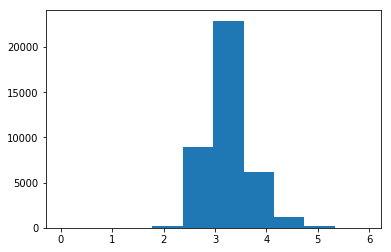

In [8]:
plt.hist(np.log10(data['shares']))
plt.show()

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


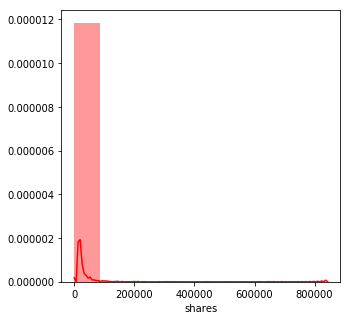

In [9]:
#print(data['shares'].describe())
plt.figure(figsize=(5,5))
sns.distplot(data['shares'], color='r', bins=10)

The distribution of the target variable (Shares) is very uneven, many outliers can be found. As shown in the following figures, the max of the shares is  far beyond the median.

In [10]:
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

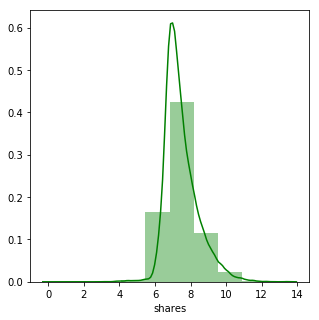

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(np.log(data['shares']), color='g', bins=10)

# Data in Histogram

Plotting the histogram to find missing values which are represented as zero.

While checking the dataset for 0 values, I found 0 values in
rate_positive_words, rate_negative _words, and
average_token_length variables

The Histograms also show that there are many categorical variables.

['data_channel_is_lifestyle',' data_channel_is_entertainment ', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world','kw_max_max',' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', 'is_weekend']


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


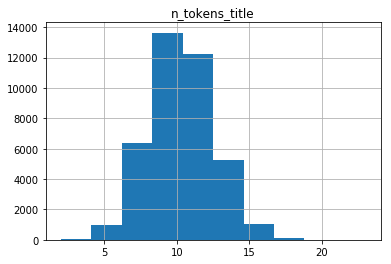

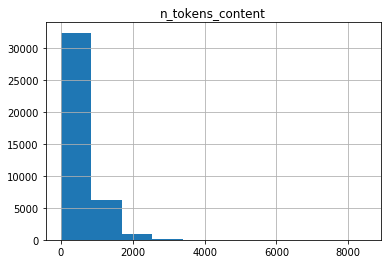

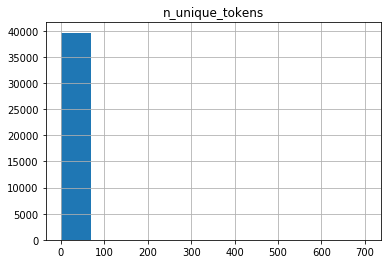

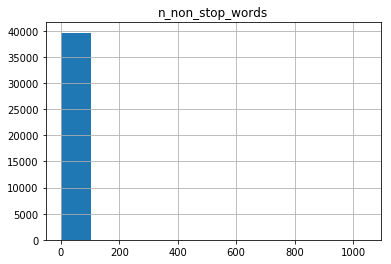

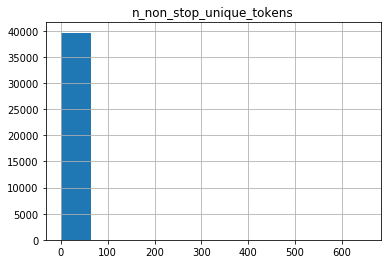

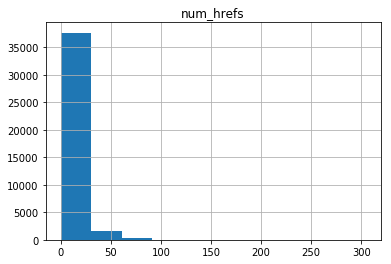

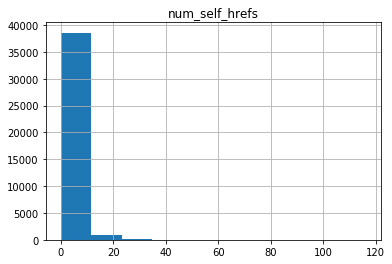

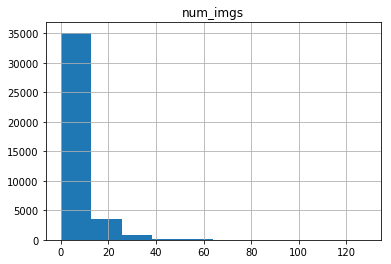

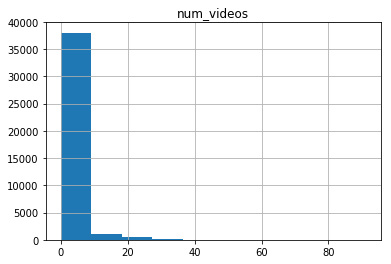

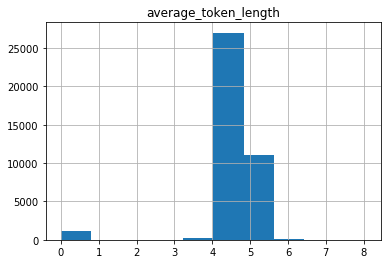

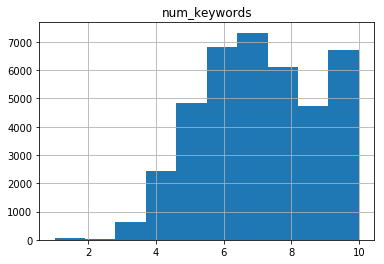

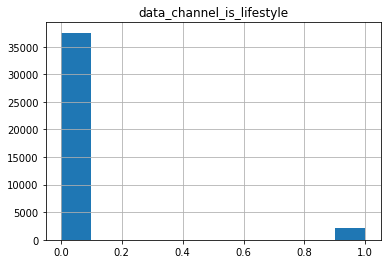

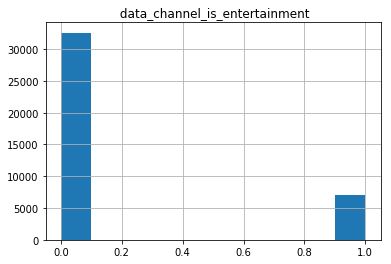

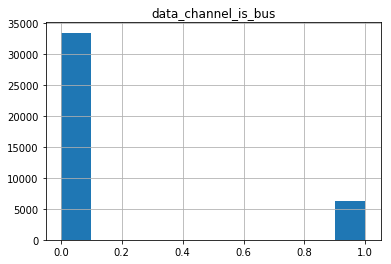

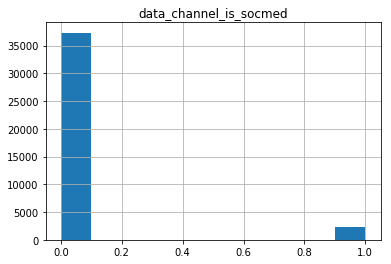

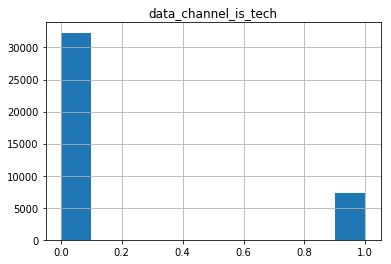

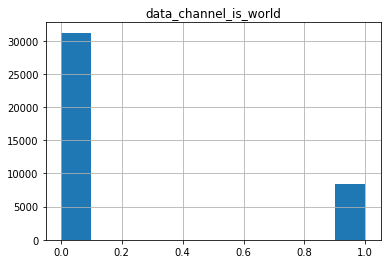

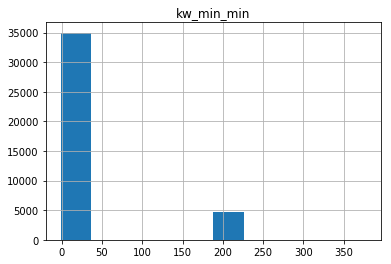

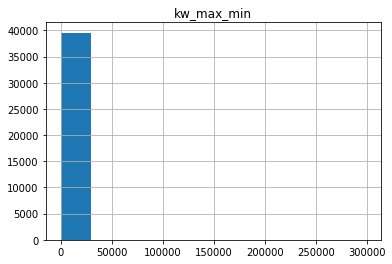

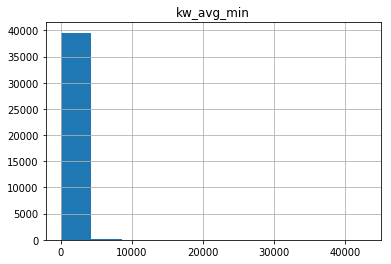

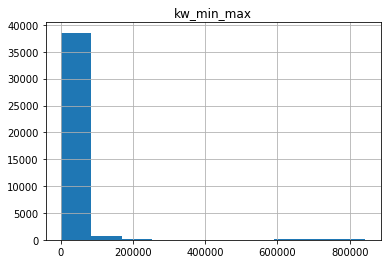

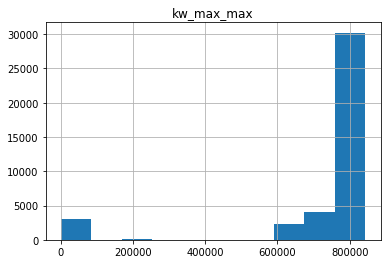

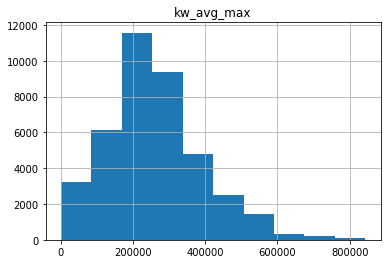

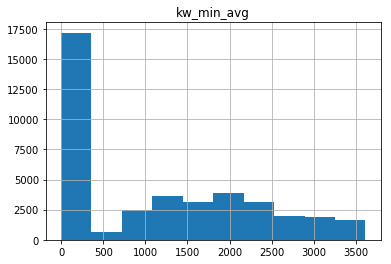

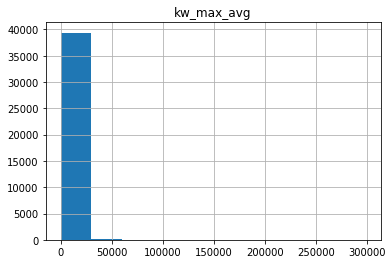

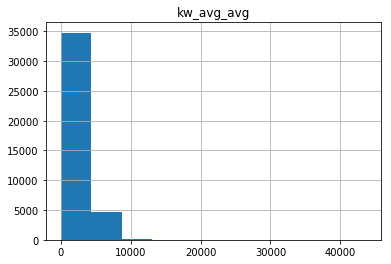

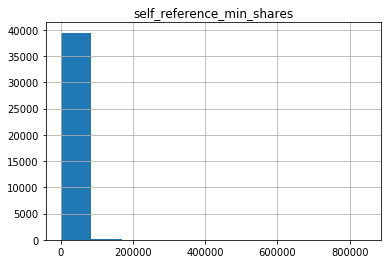

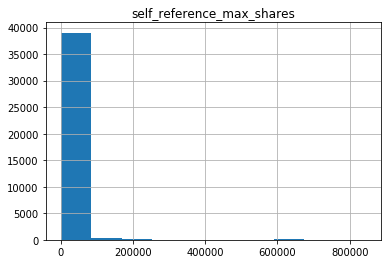

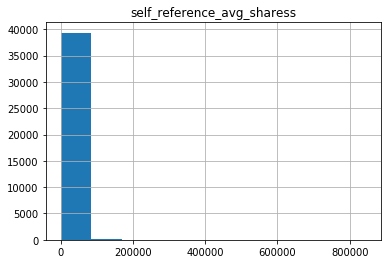

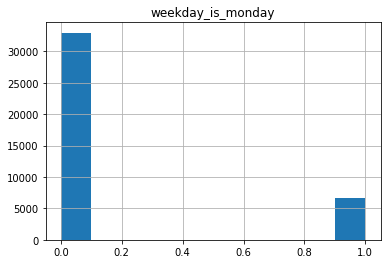

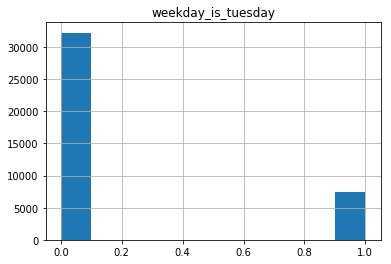

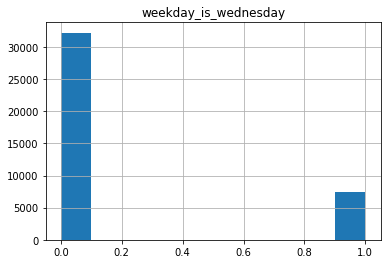

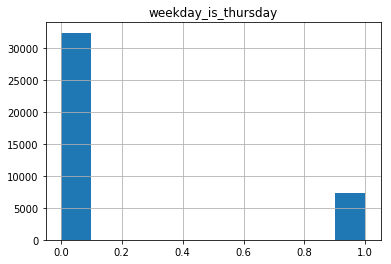

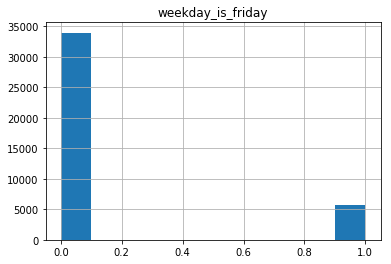

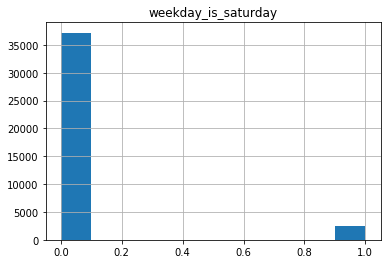

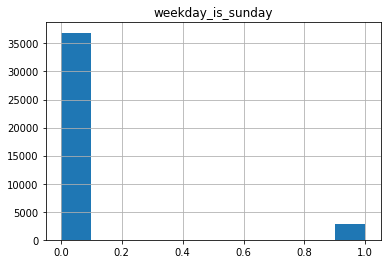

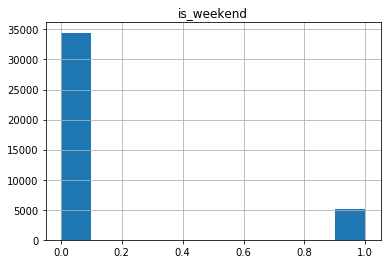

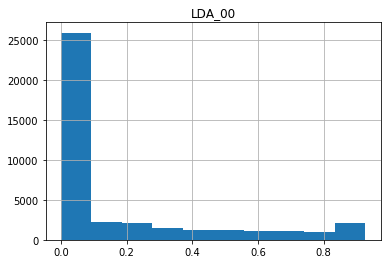

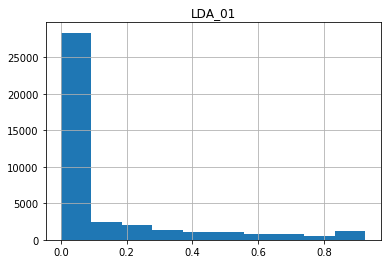

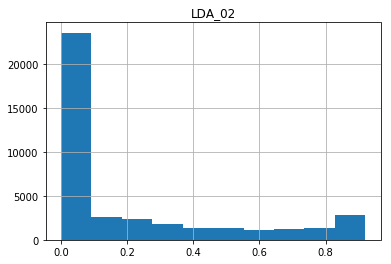

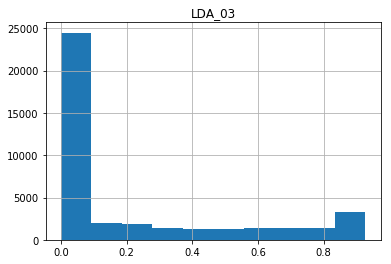

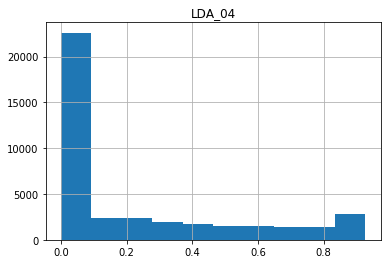

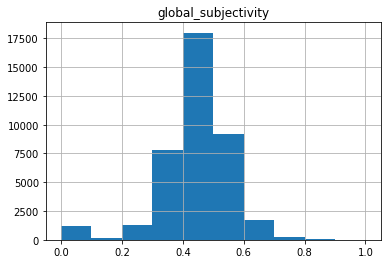

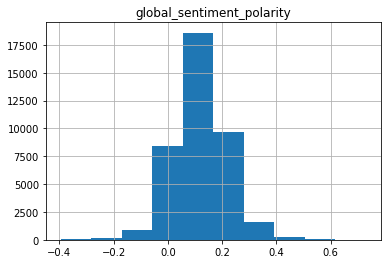

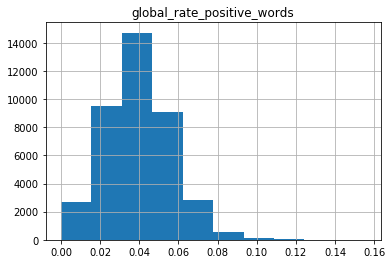

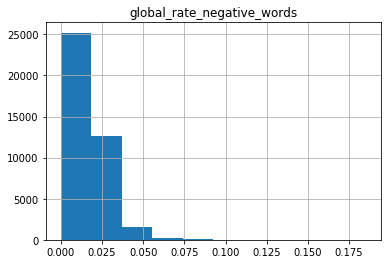

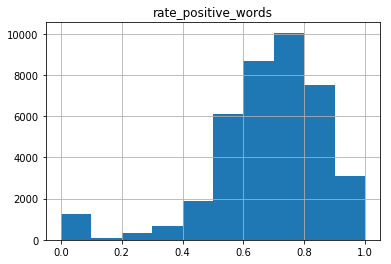

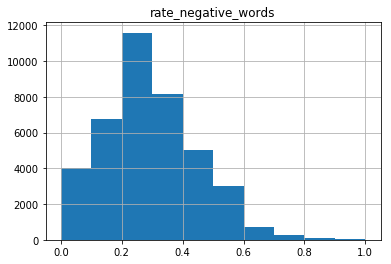

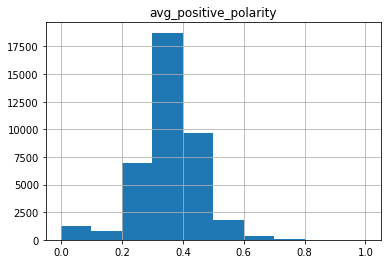

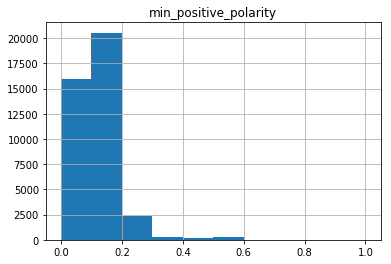

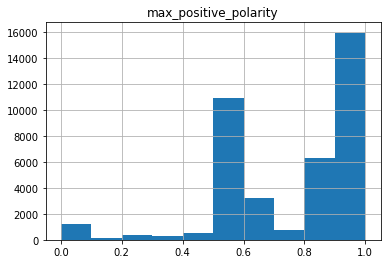

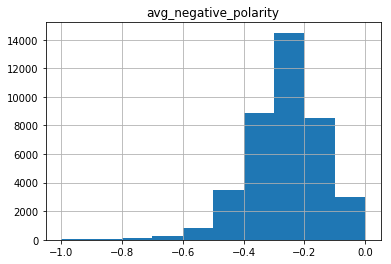

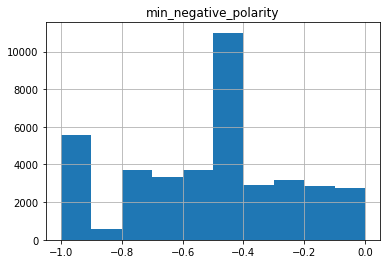

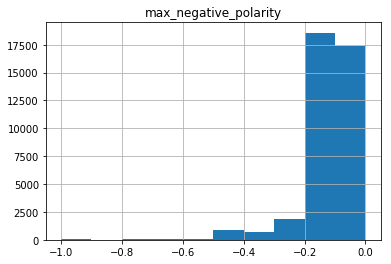

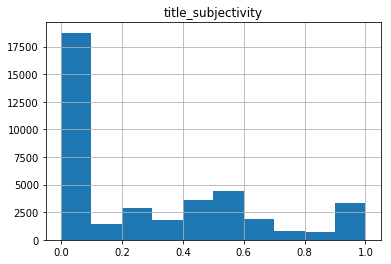

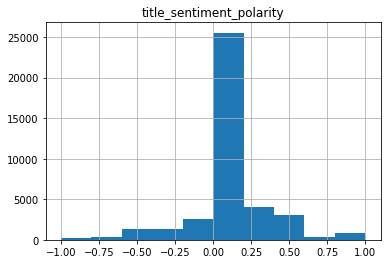

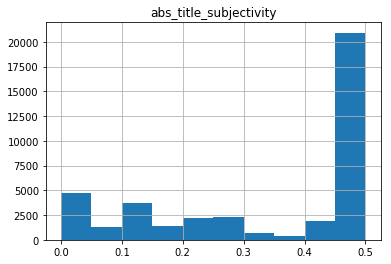

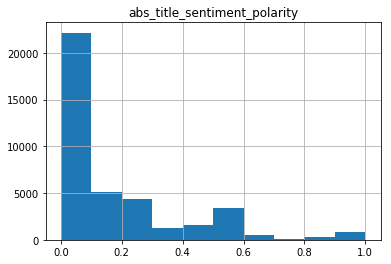

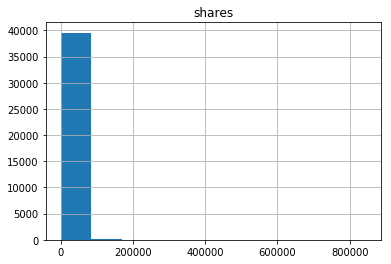

In [12]:
for i in data.iloc[:,0:60]:
    data.hist(i,bins=10)

# Removing the 0 values from  rate_positive_words, rate_negative words, and average_token_length variables

In [13]:
print("number of 0 values in the average_token_length = {}".format(len(data[data.average_token_length == 0])))

print("number of 0 values in the rate_negative_words = {}".format(len(data[data.rate_negative_words == 0])))

print("number of 0 values in the rate_positive_words = {}".format(len(data[data.rate_positive_words == 0])))


number of 0 values in the average_token_length = 1181
number of 0 values in the rate_negative_words = 2550
number of 0 values in the rate_positive_words = 1217


In [14]:

data = data[data.average_token_length != 0]
data = data[data.rate_positive_words + data.rate_negative_words != 0]
data.shape

(38458, 59)

# Data Visualization

In order to visualizate data i am using use seaborn plots

# Outliers

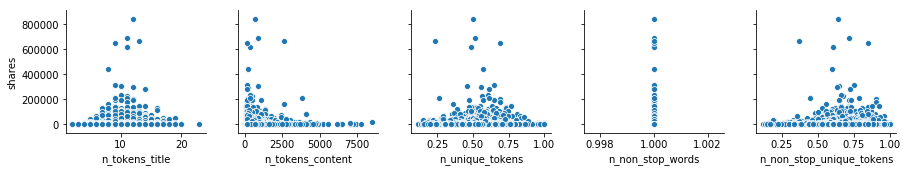

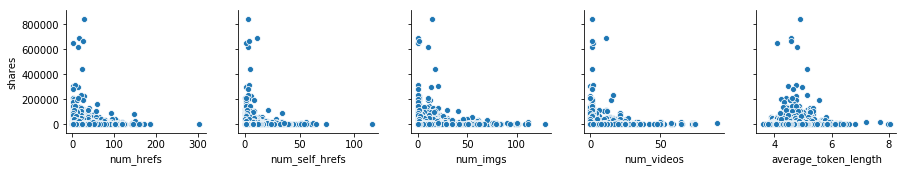

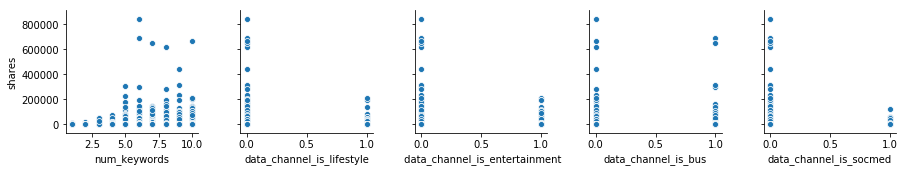

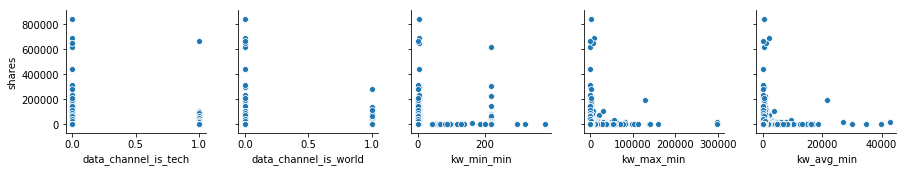

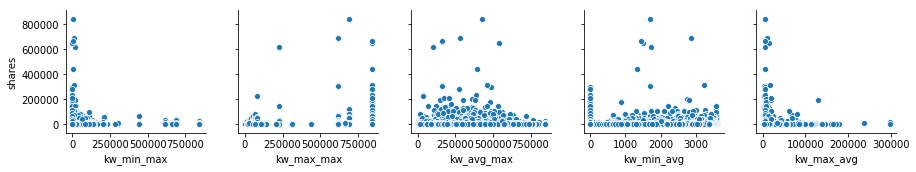

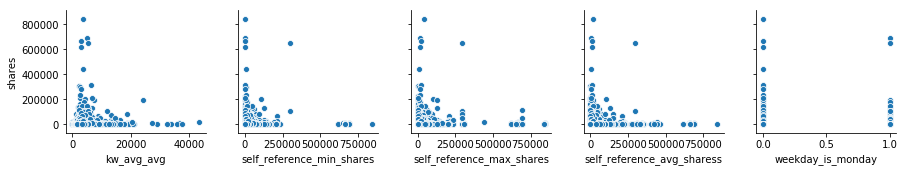

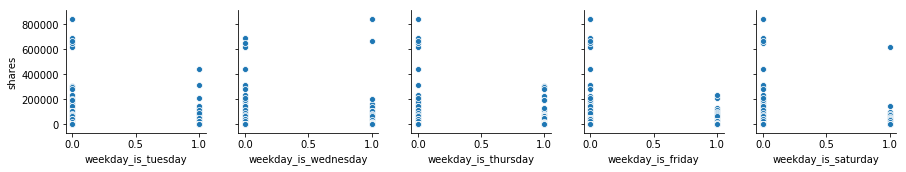

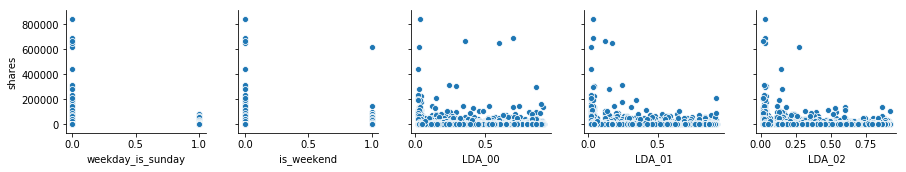

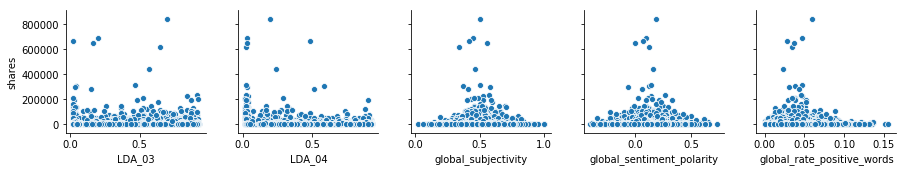

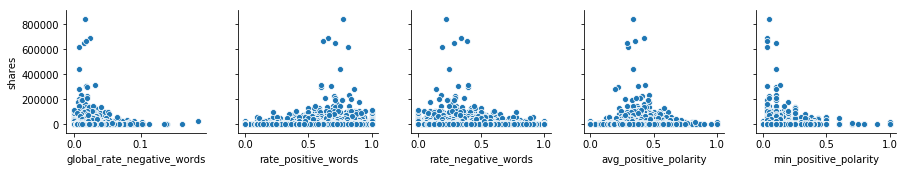

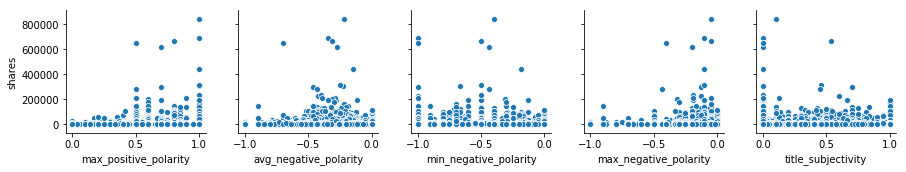

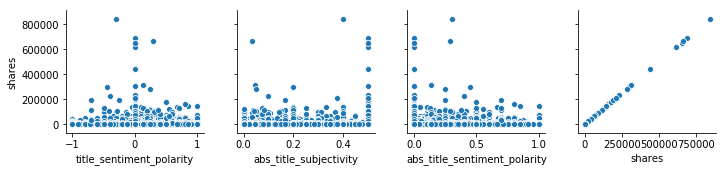

In [15]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['shares'])


From the above pair plots , we can clearly see that following attributes have outliers .

1. All the records in n_non_stop_words lie in the range from 0 to 1, except 1 record which is 1041 and it has been removed as an outlier. From the  data summary of the n_non_stop_words field, where the mean lies at 1 but the maximum value was 1041.

2. Similarly n_unique_tokens,n_non_stop_unique_tokens ,n_tokens_title , num_hrefs ,num_self_hrefs  have outliers .

I will be deleting those observations from those attributes

In [16]:
data = data[data.n_non_stop_words <=1]  
data = data[data.n_unique_tokens <=1]
data = data[data.n_non_stop_unique_tokens<=1]
data = data[data.num_hrefs <200]
data = data[data.num_self_hrefs <100]
data = data[data.n_tokens_title <=20]
        

data.shape

(38455, 59)

# Analysing Data with box plots

A boxplot can show whether a data set is symmetric or skewed . A symmetric data set shows the median roughly in the middle of the box.The median, is shown by the line that cuts through the box in the boxplot.


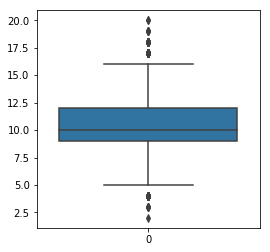

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
#sns.boxplot(data=np.log(data['n_tokens_title']))
sns.boxplot(data=data['n_tokens_title'])

plt.show()

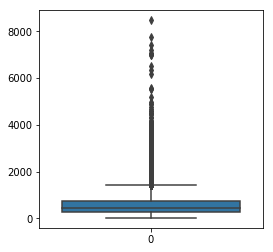

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=data['n_tokens_content'])
plt.show()

n_token_content  is the number of words in the posted article.

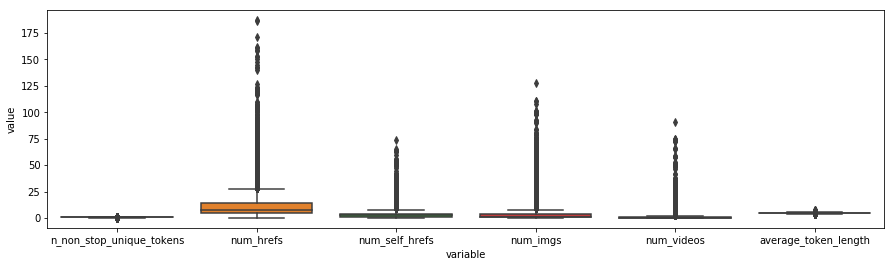

In [19]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,4:10]))
plt.show()

“num_imgs” gives the number of images in the article.

“num_videos” gives the number of videos in the article.

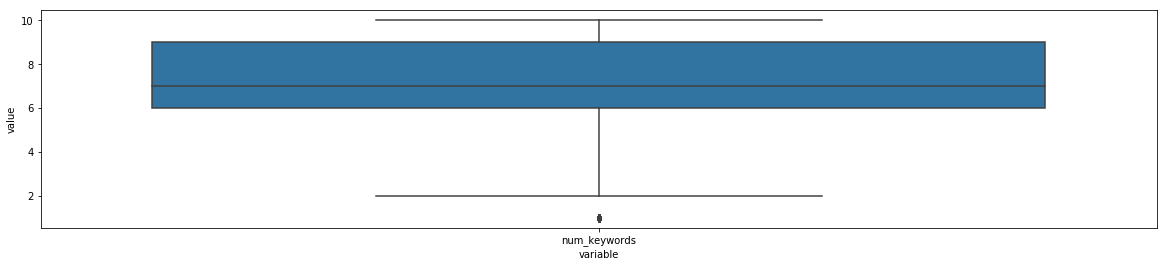

In [20]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,10:11]))
plt.show()

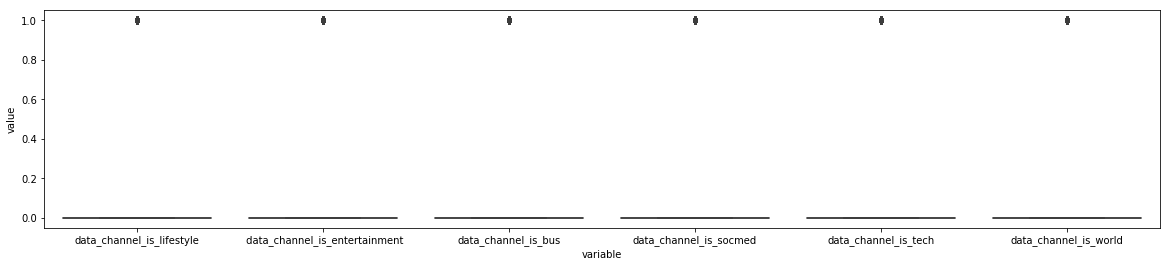

In [21]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,11:17]))
plt.show()

Above boxplots of the channel variables are the categorical variables, either they are 1 or 0

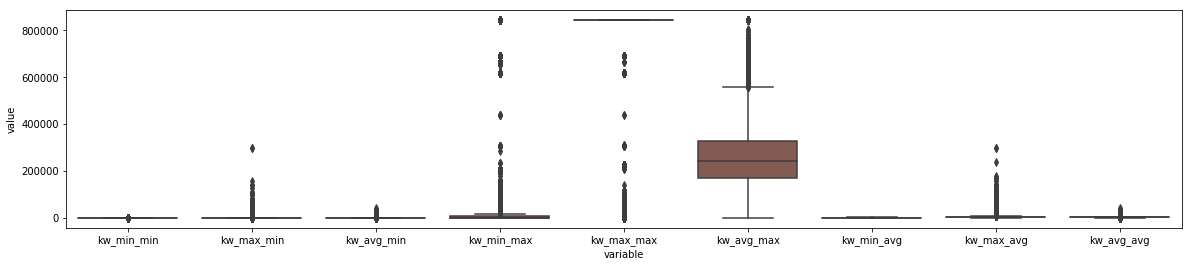

In [22]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,17:26]))
plt.show()

The keyword-related features are used to describe the maximum, minimum and average shares numbers of best, worst and average keywords. From the above boxplots, we can see that the peaks of these feature are  extreme values.
We can see many outliers existing in this features.

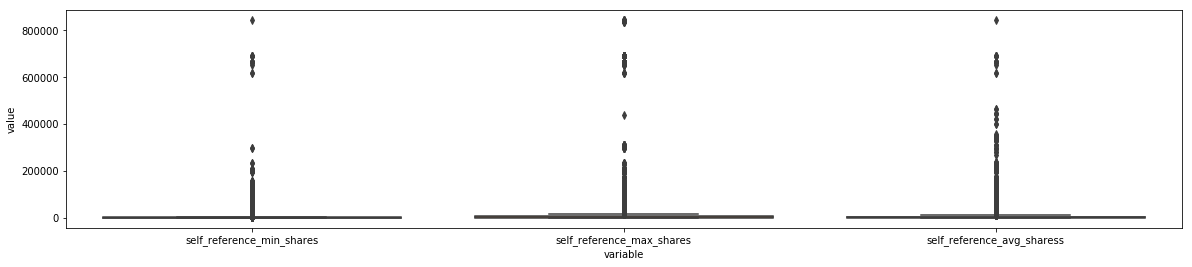

In [23]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,26:29]))
plt.show()

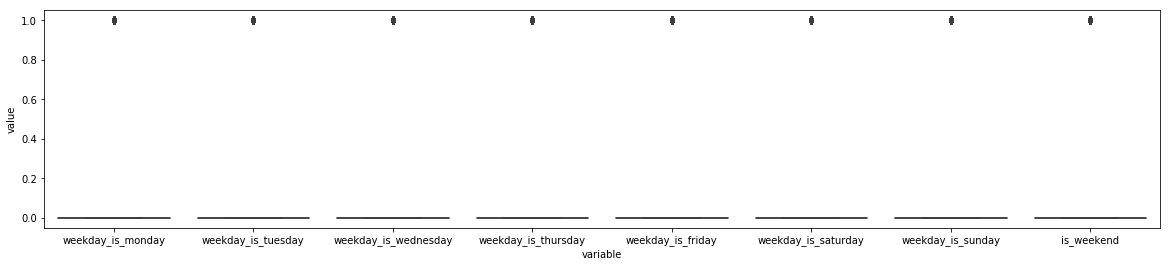

In [24]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,29:37]))
plt.show()

Above boxplots belong to the weekdays, they are also categorical variables.

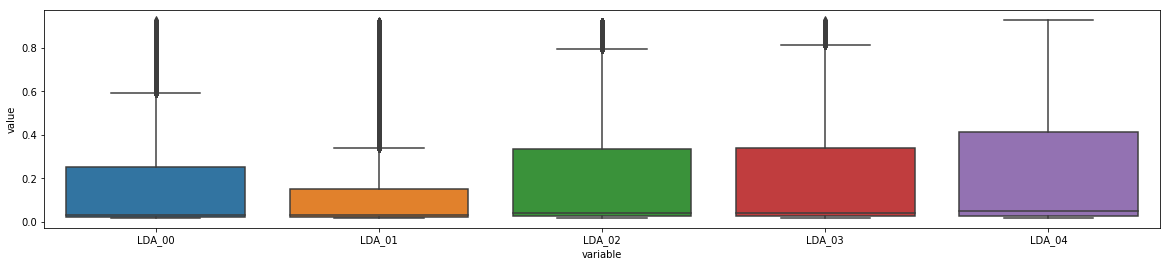

In [25]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,37:42]))
plt.show()

From the LDA-topic-related features which are used to describe how close the posted article’s topic is to a specific LDA topic. From both the boxplot , the outlier  are very clear in LDA_00 and LDA_01. 

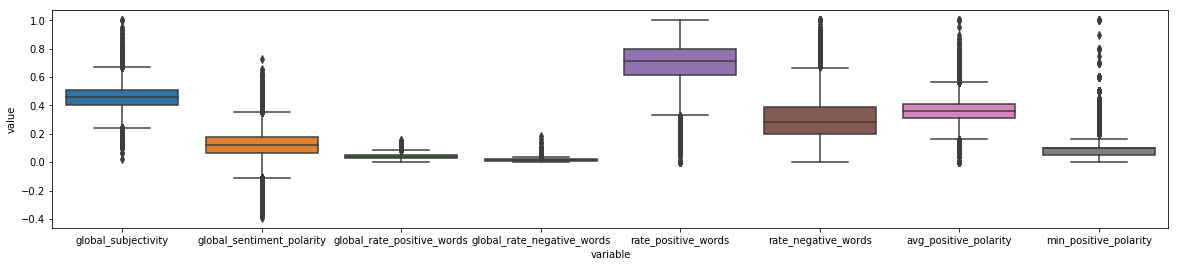

In [26]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,42:50]))
plt.show()

rom the LDA-topic-related features which are used to describe how close the posted article’s topic is to a specific LDA topic. From  the boxplot the outlier visible in LDA_00 and LDA_01. 

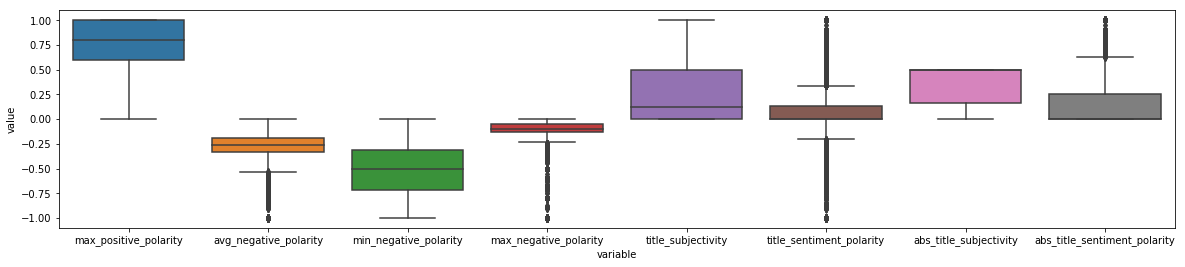

In [27]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,50:58]))
plt.show()

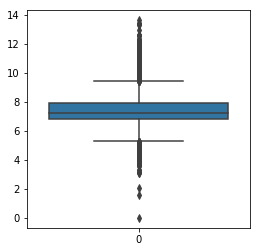

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=np.log(data['shares']))
plt.show()

# Removing Outliers  : Method 1 , using Interquartile Range


In [29]:
#Step1: Finding Median, First quartile(Q1), Third quartile(Q3), Interquartile range(IQR)

shares_stats= data['shares'].describe()
Q1 = round(shares_stats['25%'] , 4)
Q3 = round(shares_stats['75%'] , 4)
median = round(shares_stats['50%'] , 4)        
IQR = Q3-Q1
print(shares_stats)

#Step 2 :Finding minor outlier 

lower_threshold_minor = Q1 - (1.5 * IQR)
upper_threshold_minor = Q3 + (1.5 * IQR)
print("minor outliers")
print(lower_threshold_minor,upper_threshold_minor)

#Step 3 :Finding major outlier
lower_threshold_major = Q1 - (3 * IQR)
upper_threshold_major = Q3 + (3 * IQR)
print("major ouliers")
print(lower_threshold_major,upper_threshold_major)

data_no_outliers = data[data["shares"]<=8362]
data_no_outliers.shape

count     38455.000000
mean       3355.363022
std       11587.123061
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64
minor outliers
-1687.5 5332.5
major ouliers
-4320.0 7965.0


(35832, 59)

In [30]:
#statistics of target variable after removing outliers
data_no_outliers['shares'].describe()

count    35832.000000
mean      1911.132200
std       1534.047753
min          1.000000
25%        920.000000
50%       1300.000000
75%       2300.000000
max       8300.000000
Name: shares, dtype: float64

#pair plots after removing outliers

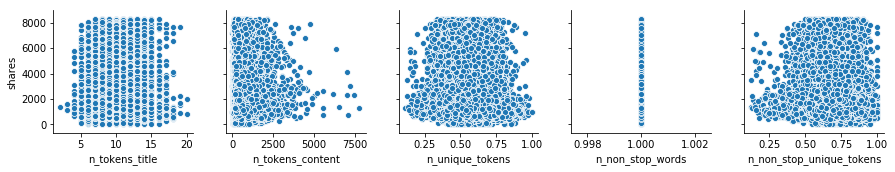

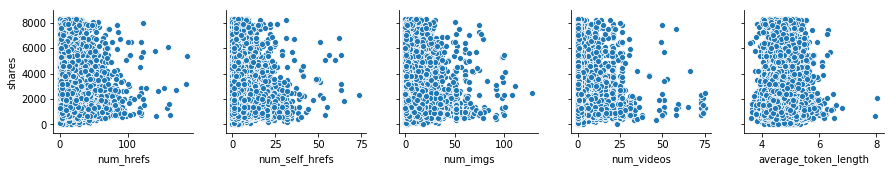

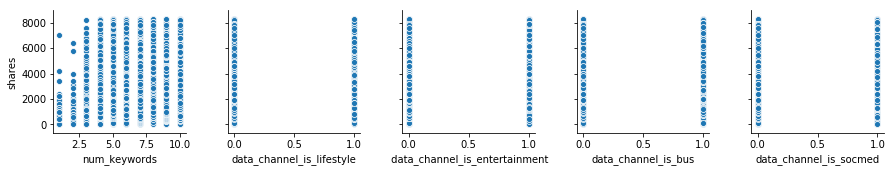

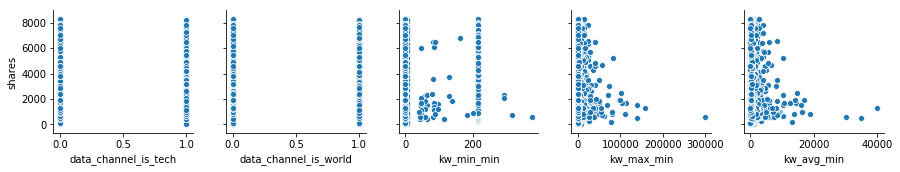

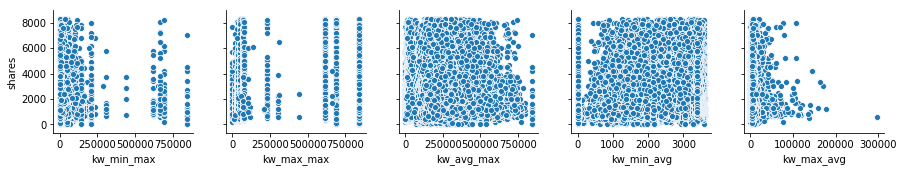

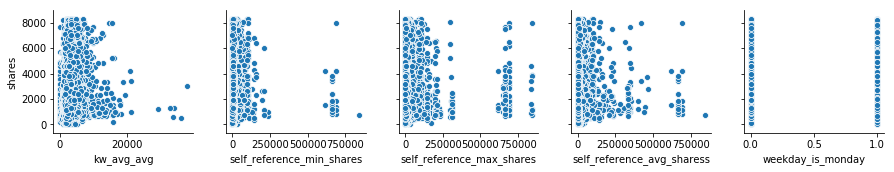

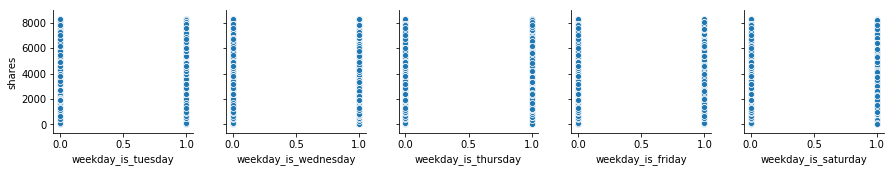

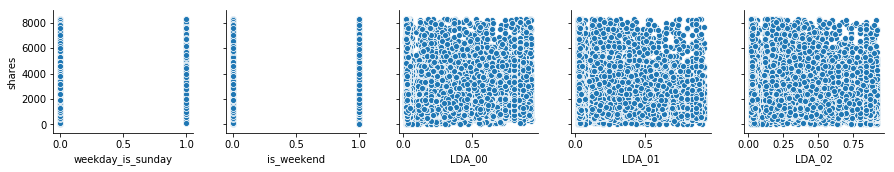

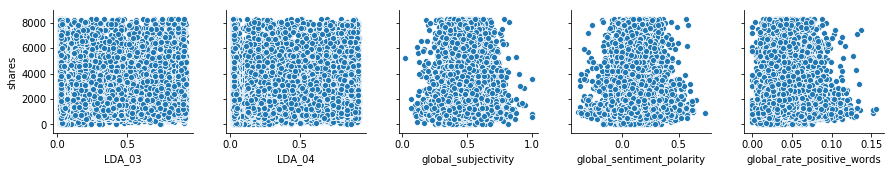

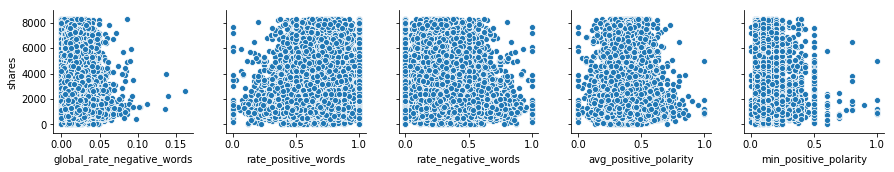

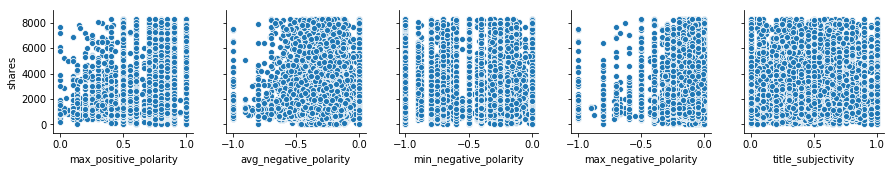

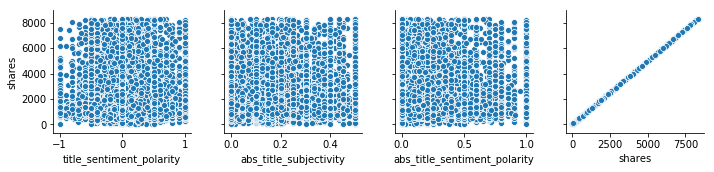

In [31]:
for i in range(0, len(data_no_outliers.columns), 5):
    sns.pairplot(data=data_no_outliers,
                x_vars=data_no_outliers.columns[i:i+5],
                y_vars=['shares'])

# Removing Outliers  : Method 2 , using Standard Deviation

In [32]:
shares_stats= data['shares'].describe()
median = round(shares_stats['50%'] , 4) 
STD = round(shares_stats['std'] , 4)        


data_no_outliers_std = data[data.shares >( median- 2*STD)] 
data_no_outliers_std = data[data.shares < (median+ 2*STD)]
print(data_no_outliers_std['shares'].describe())
data_no_outliers_std.head(10)

count    37895.000000
mean      2538.915134
std       3167.454572
min          1.000000
25%        939.000000
50%       1400.000000
75%       2600.000000
max      24500.000000
Name: shares, dtype: float64


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


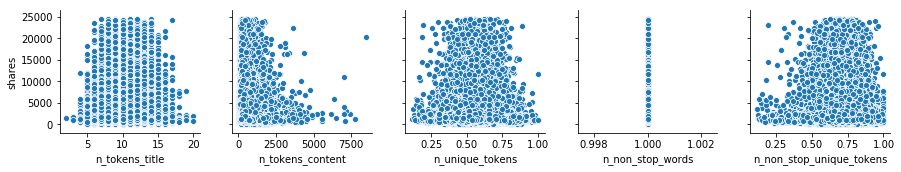

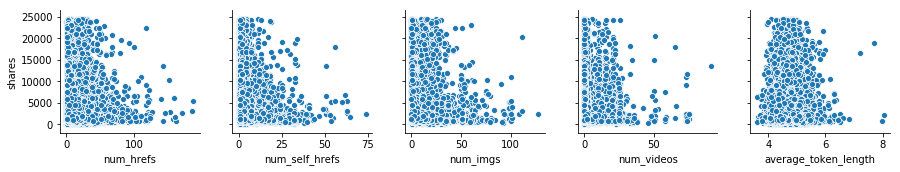

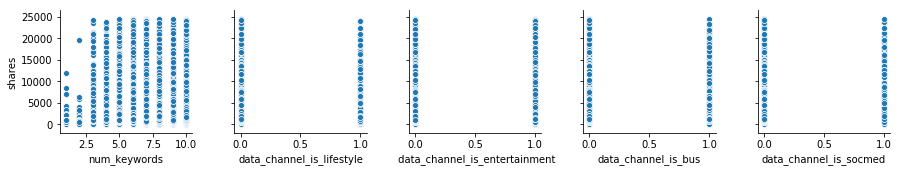

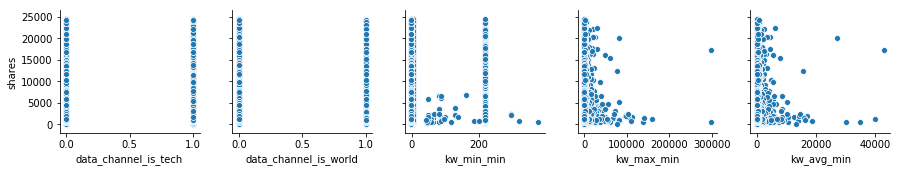

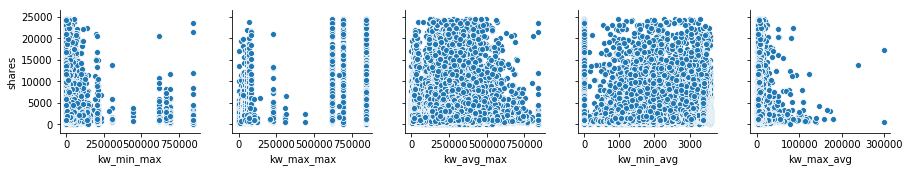

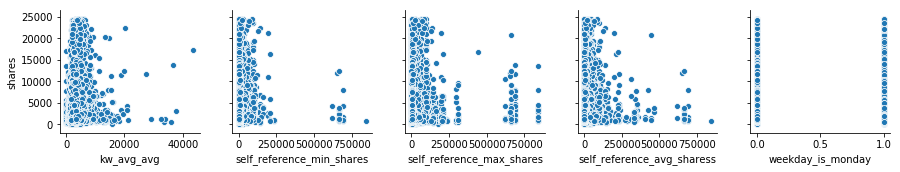

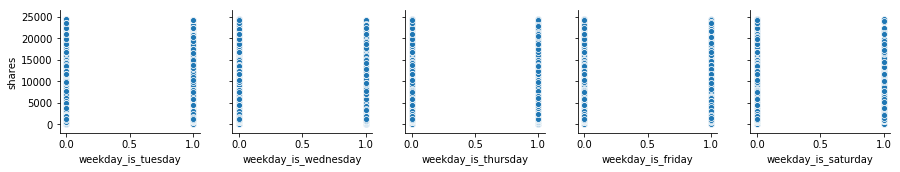

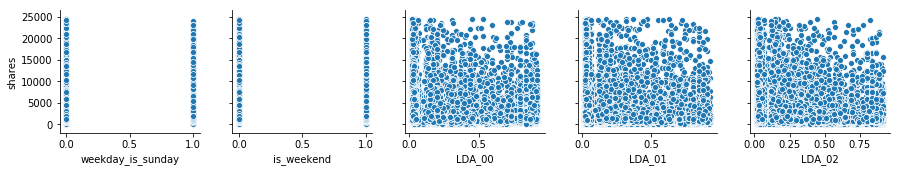

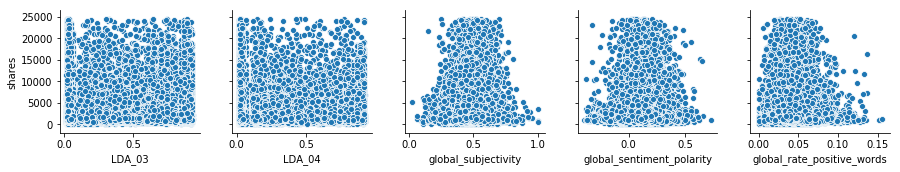

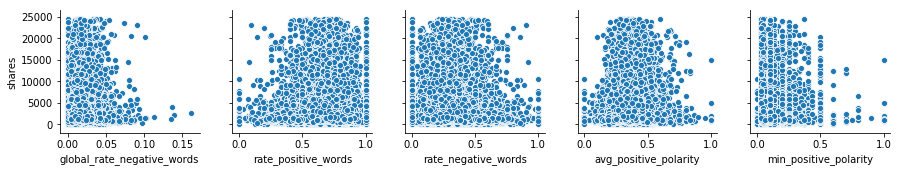

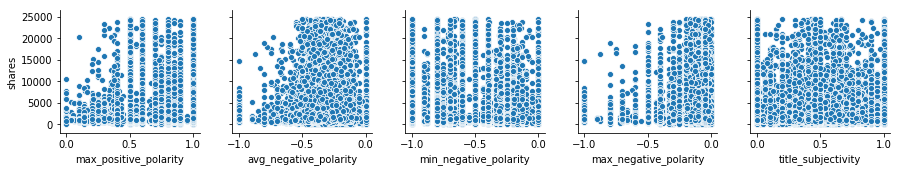

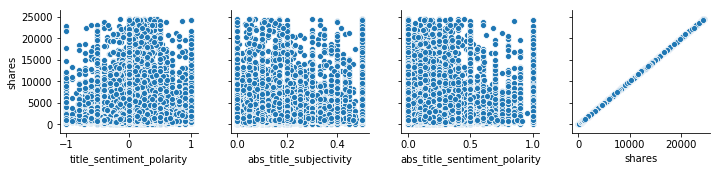

In [33]:
for i in range(0, len(data_no_outliers_std.columns), 5):
    sns.pairplot(data=data_no_outliers_std,
                x_vars=data_no_outliers_std.columns[i:i+5],
                y_vars=['shares'])

#Method 1 (using Inter quartile range ) --- we lost 9.5% of data

#Method 2(using Standard Deviation) ---- we lost only 4.5% of  data, 
considering this I prefer Method 2

#  Relation Between (n_tokens_title)Number of words in the title  and number of shares 

This seems to indicate that , the articles with the most number of shares should have titles that are around 6 to 14 words.

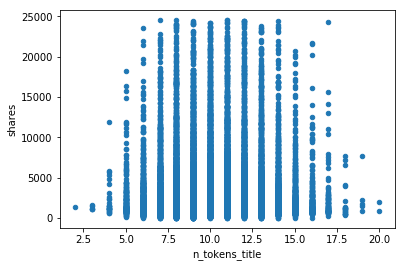

In [34]:
data_no_outliers_std.plot(x='n_tokens_title' ,  y='shares', kind ='scatter')

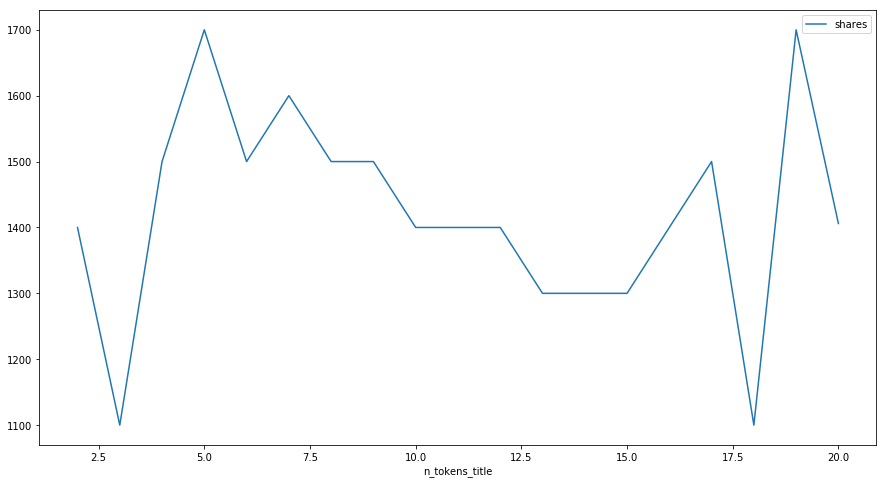

In [35]:
n_tokens_title = data_no_outliers_std[['n_tokens_title','shares']]
n_tokens_title.sort_values('n_tokens_title',ascending=False)
#print(n_tokens_title.groupby('n_tokens_title').mean())
n_tokens_title.groupby('n_tokens_title').median().plot(figsize=(15,8))


# Relation Between (n_tokens_content)Number of words in the article and number of shares

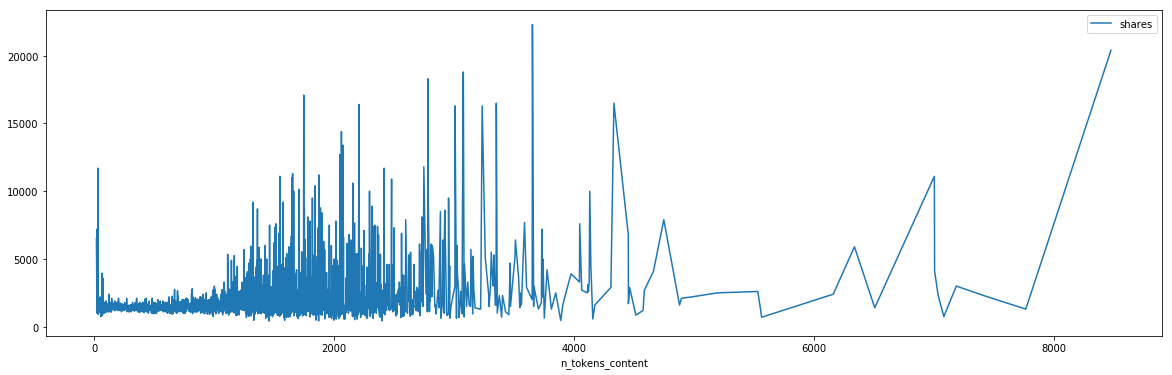

In [36]:
n_tokens_content = data_no_outliers_std[['n_tokens_content','shares']]
n_tokens_content = n_tokens_content.sort_values('n_tokens_content',ascending=False)
#print(n_tokens_content.groupby('n_tokens_content').median())
n_tokens_content.groupby('n_tokens_content').median() .plot(figsize=(20,6))


# Relation between the number of images in the article and the average shares 

Text(0, 0.5, '  Average Shares ')

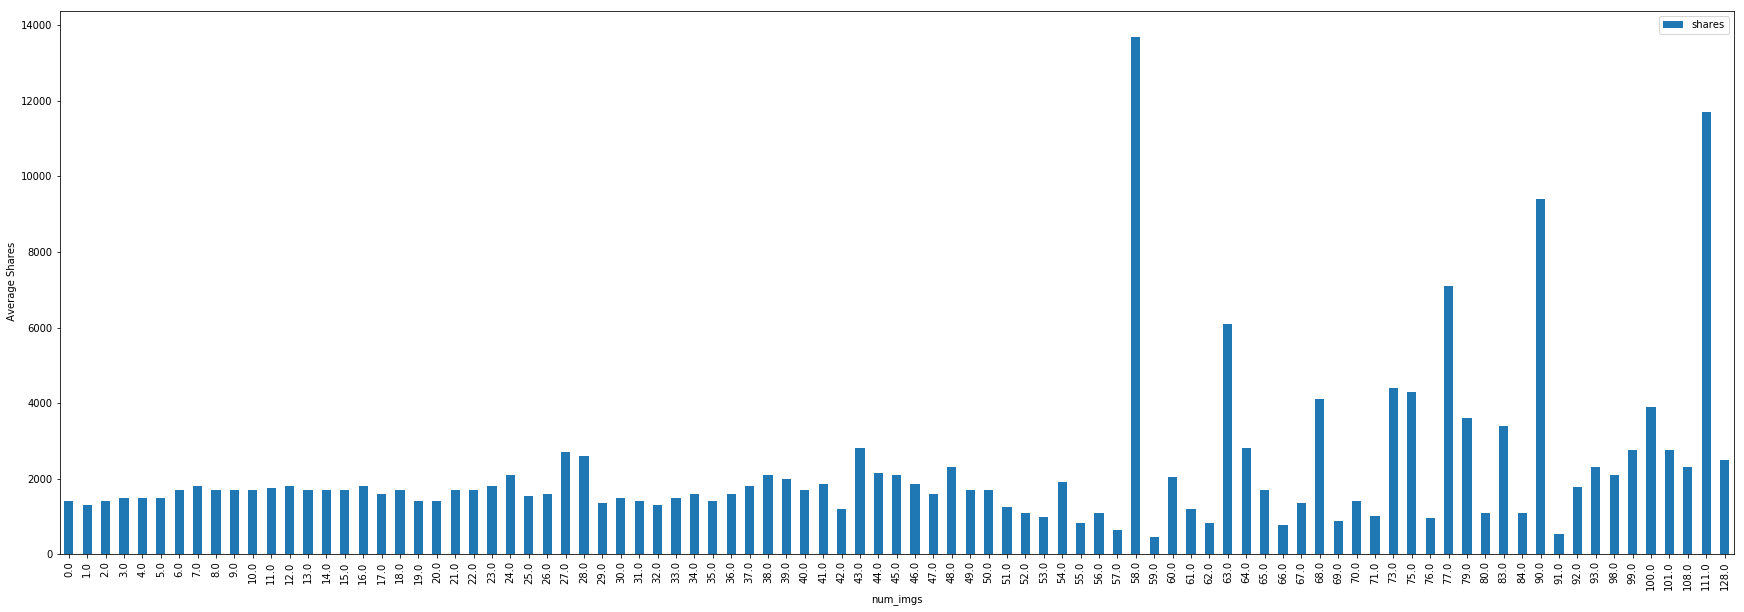

In [37]:
images = data_no_outliers_std[['num_imgs','shares']]
images = images.sort_values('num_imgs',ascending=False)
#print(images.groupby('num_imgs').mean())
images.groupby('num_imgs').median().plot(kind='bar', figsize=(30,10))
plt.ylabel("  Average Shares ")

# Relation between the number of videos in the article and the shares

Text(0, 0.5, '  Average Shares ')

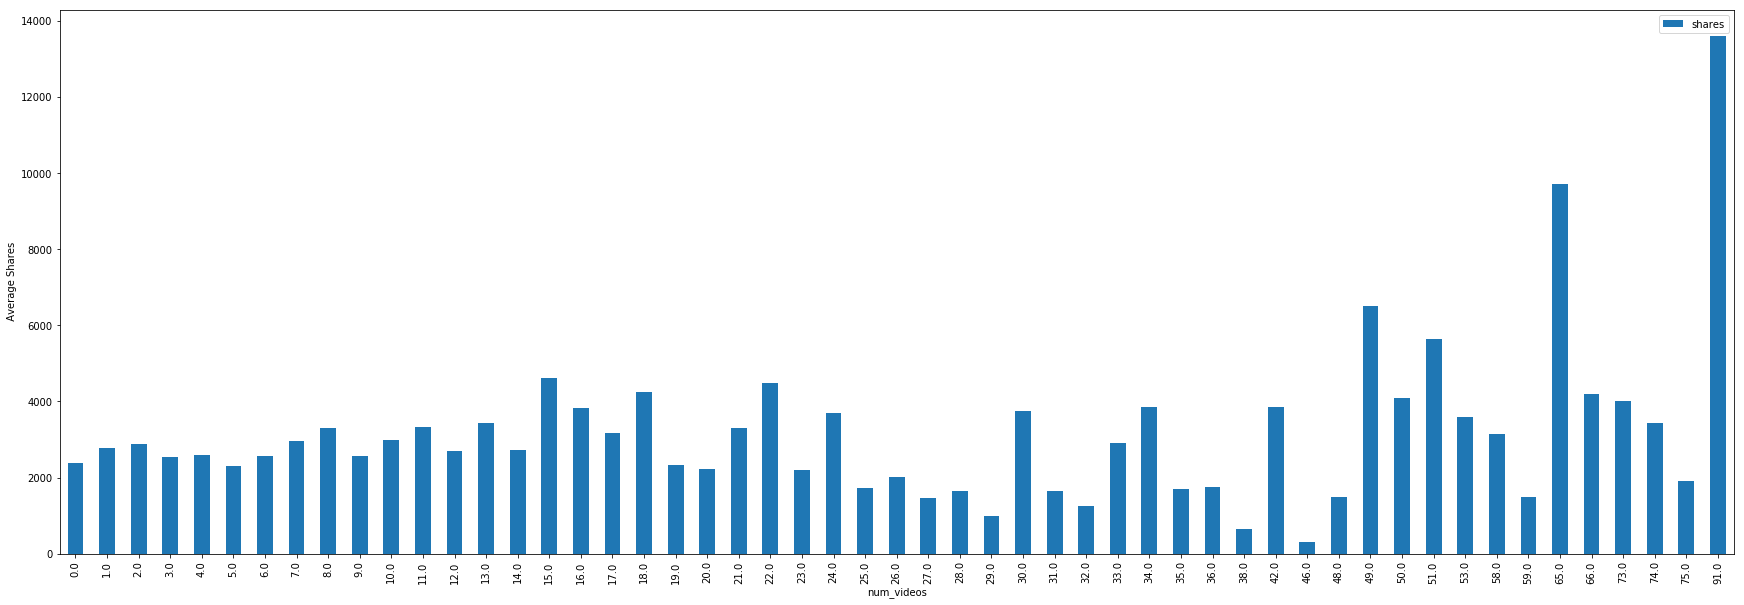

In [38]:
videos = data_no_outliers_std[['num_videos','shares']]
videos.sort_values('num_videos',ascending=False)
#print(videos.groupby('num_videos').mean())
videos.groupby('num_videos').mean().plot(kind='bar', figsize=(30,10))
plt.ylabel("  Average Shares ")

# Comparing the Type of the article and the number of shares it gets

From the bar graph it is evident that articles are getting more number of shares when the data channel is either lifestyle or social media 

Text(0.5, 1.0, ' Type of article Vs shares')

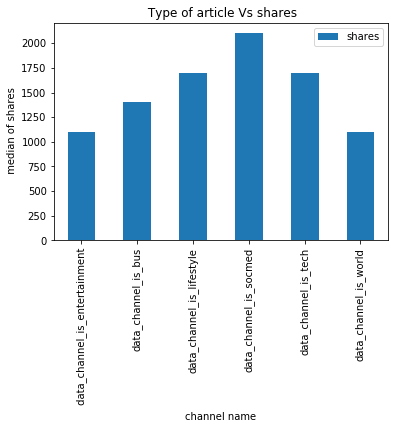

In [39]:
list_channels=['data_channel_is_lifestyle',' data_channel_is_entertainment', 
             'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']
data_channels=data_no_outliers_std[list_channels]

channel_name = data_channels.idxmax(axis=1)

channel_name = pd.DataFrame(channel_name,columns=['channel name'])
channel_name['shares']= data_no_outliers_std['shares']
channels= channel_name.groupby('channel name').median()
channels.plot(kind ='bar')
plt.ylabel("  median of shares ")
plt.title(" Type of article Vs shares")

We can see that amongst the 6 categories news articles belonging to ‘social media’ category have received highest popularity 

# comparing the number of shares depending on the day of the week


Box plot for the day article was published and the number of shares is plotted, which showed articles posted on weekend has slightly more shares compared to other news posted on weekdays.

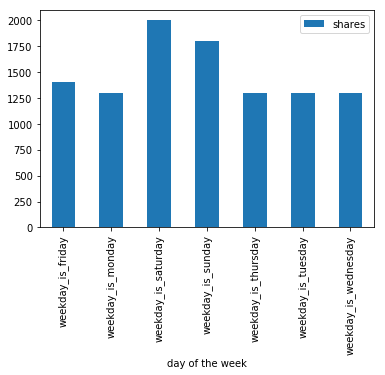

In [40]:
day=['weekday_is_monday','weekday_is_tuesday', 'weekday_is_wednesday',
     'weekday_is_thursday', 'weekday_is_friday',
     'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
data_days = data_no_outliers_std[day]
data_days = data_days.idxmax(axis=1)

data_days = pd.DataFrame(data_days ,columns=['day of the week'])
data_days['shares'] = data_no_outliers_std['shares']
days = data_days.groupby('day of the week').median()
#days.unstack()
days.plot(kind = 'bar')
#plt.title("shares on weekdays")
#plt.xlabel(" days of the week")
#plt.ylabel(" mean of shares")



# Initial Hypothesis :
My initial hypothesis is that the article types , the article titles  and the day that the article was published have great influence on the number of shares.
 If a article with an avg number of words in the title between 6 and 14, and the article type being either 
 lifestyle ,social media and published on the weekends may get maximum shares

In [41]:
"""
neg_pos_words = data_no_outliers_std[['rate_negative_words','rate_positive_words','shares']]

neg_pos_words = pd.melt( neg_pos_words , id_vars = ['shares'] ,
                         value_vars =['rate_negative_words','rate_positive_words'],
                         var_name='neg_pos_words')
                        
neg_pos_words.groupby('neg_pos_words').median()
#neg_pos_words

"""

"\nneg_pos_words = data_no_outliers_std[['rate_negative_words','rate_positive_words','shares']]\n\nneg_pos_words = pd.melt( neg_pos_words , id_vars = ['shares'] ,\n                         value_vars =['rate_negative_words','rate_positive_words'],\n                         var_name='neg_pos_words')\n                        \nneg_pos_words.groupby('neg_pos_words').median()\n#neg_pos_words\n\n"

In [42]:
list_cat=['data_channel_is_lifestyle',' data_channel_is_entertainment', 
             'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world','weekday_is_monday', 
            'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday',
             'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
categorical_data= data_no_outliers_std[list_cat]
categorical_data.head()

data_qunatitative =  data_no_outliers_std.drop(list_cat, axis= 1)
data_qunatitative.head()



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Correlation between the data

In [43]:

data_correlation= data_qunatitative.corr()
data_correlation

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.028698,-0.030337,0.041818,-0.018280,-0.047083,-0.007206,-0.005837,0.051780,-0.090146,...,-0.014947,0.002694,-0.035096,-0.046449,0.003777,0.078799,0.000774,-0.150404,0.041439,-0.022456
n_tokens_content,0.028698,1.000000,-0.749647,0.600906,-0.601860,0.407174,0.286304,0.357715,0.103033,-0.074219,...,-0.324877,0.372527,-0.065180,-0.417767,0.277007,0.012299,0.026986,0.004105,0.020995,0.017937
n_unique_tokens,-0.030337,-0.749647,1.000000,-0.796001,0.885550,-0.316561,-0.213162,-0.342929,0.013776,0.064445,...,0.351051,-0.325912,0.026328,0.340540,-0.276187,0.016383,-0.028449,-0.021811,-0.002211,-0.004406
n_non_stop_words,0.041818,0.600906,-0.796001,1.000000,-0.642804,0.334504,0.183056,0.235453,0.076608,0.055461,...,-0.411959,0.357150,-0.107529,-0.396972,0.268333,-0.020730,0.012814,0.042104,-0.002388,-0.003204
n_non_stop_unique_tokens,-0.018280,-0.601860,0.885550,-0.642804,1.000000,-0.373438,-0.216277,-0.478920,-0.005797,-0.075177,...,0.227327,-0.244462,0.024282,0.232504,-0.176449,-0.013710,-0.043967,-0.003560,-0.030498,-0.031131
num_hrefs,-0.047083,0.407174,-0.316561,0.334504,-0.373438,1.000000,0.382444,0.358032,0.116886,0.193360,...,-0.128227,0.239314,-0.098839,-0.225291,0.092939,0.051384,0.043019,0.006570,0.063717,0.089037
num_self_hrefs,-0.007206,0.286304,-0.213162,0.183056,-0.216277,0.382444,1.000000,0.248614,0.077288,-0.046717,...,-0.114174,0.134239,-0.006274,-0.082485,0.072485,-0.007257,0.029403,0.006399,-0.002432,0.018795
num_imgs,-0.005837,0.357715,-0.342929,0.235453,-0.478920,0.358032,0.248614,1.000000,-0.064671,0.063771,...,-0.031403,0.179632,-0.072104,-0.141890,0.048395,0.060152,0.046270,-0.012517,0.064239,0.079349
num_videos,0.051780,0.103033,0.013776,0.076608,-0.005797,0.116886,0.077288,-0.064671,1.000000,-0.063867,...,-0.015079,0.136447,-0.116934,-0.139548,0.031579,0.061945,0.023094,-0.023784,0.057759,0.037294
average_token_length,-0.090146,-0.074219,0.064445,0.055461,-0.075177,0.193360,-0.046717,0.063771,-0.063867,1.000000,...,0.001267,-0.121242,0.038829,0.059307,-0.022675,-0.034150,-0.024661,0.029857,-0.031751,-0.023750


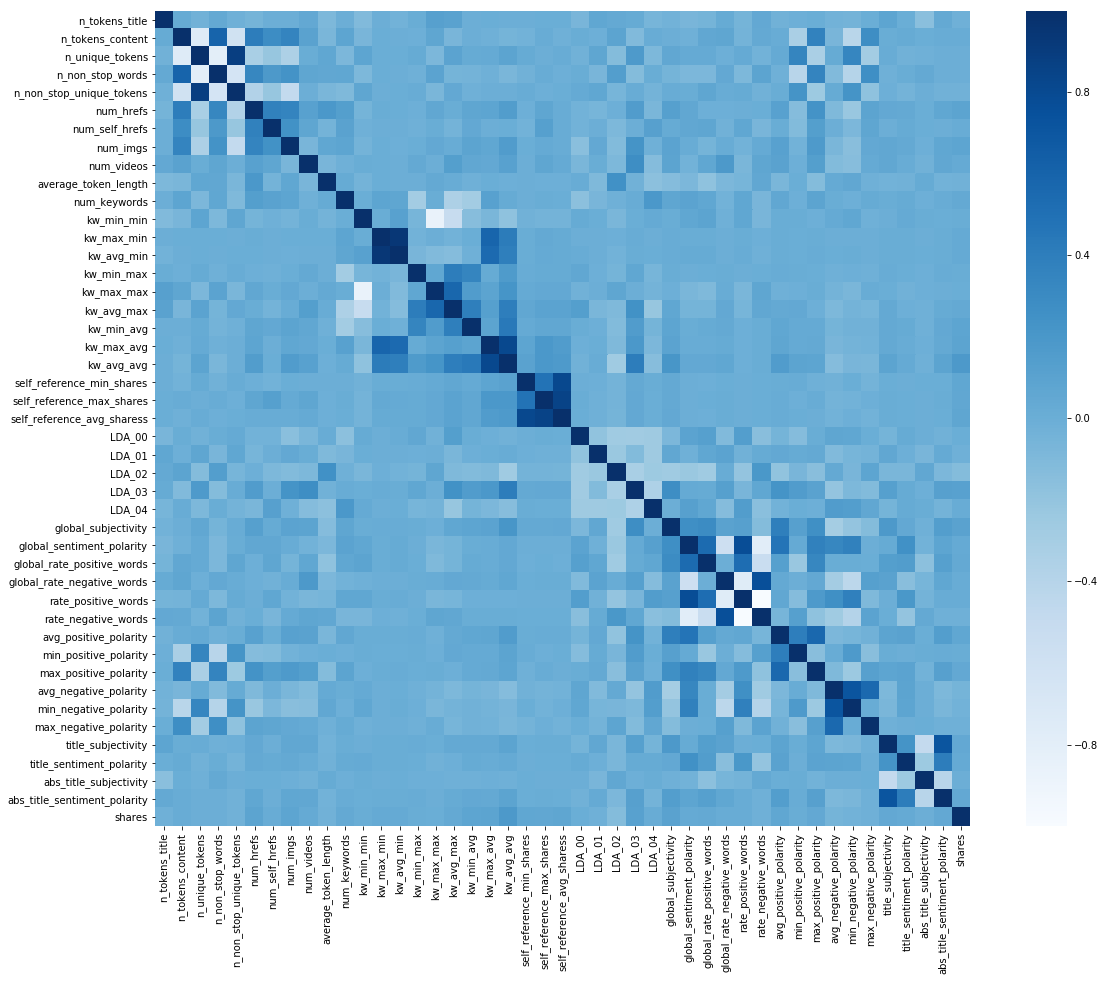

In [44]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_correlation, vmax=1, cmap= 'Blues',square=True,ax=ax);

plt.show()

In [45]:
#Now we'll try to find which features  that are strongly correlated with shares

data_correlation['shares'].sort_values(ascending=False)

shares                          1.000000
kw_avg_avg                      0.180303
LDA_03                          0.116904
global_subjectivity             0.109280
kw_max_avg                      0.092023
num_hrefs                       0.089037
num_imgs                        0.079349
kw_min_avg                      0.079052
self_reference_avg_sharess      0.072245
avg_positive_polarity           0.062947
self_reference_min_shares       0.062725
self_reference_max_shares       0.060412
max_positive_polarity           0.052633
abs_title_sentiment_polarity    0.051062
title_subjectivity              0.049027
num_keywords                    0.046613
kw_avg_max                      0.041086
global_rate_positive_words      0.040614
title_sentiment_polarity        0.037674
global_sentiment_polarity       0.037536
kw_avg_min                      0.037302
num_videos                      0.037294
kw_max_min                      0.031713
num_self_hrefs                  0.018795
n_tokens_content

From the above correlation values , we can see few attributes are having  negative correlation with the target variable means that one variable increases whenever the other decreases. 

kw_avg_min,kw_max_min are highly correlated with each other,

n_unique_tokens , n_non_stop_words, n_non_stop_unique_tokens  ---> are highly correlated with each other. 

The Target variable 'shares'  is highly correlated to kw_avg_avg
